In [1]:
!git clone https://github.com/zzh8829/yolov3-tf2
%cd yolov3-tf2/
!pip install -r requirements-gpu.txt

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 425 (delta 5), reused 1 (delta 0), pack-reused 412
Receiving objects: 100% (425/425), 4.24 MiB | 25.24 MiB/s, done.
Resolving deltas: 100% (242/242), done.
/content/yolov3-tf2
Obtaining file:///content/yolov3-tf2 (from -r requirements-gpu.txt (line 6))
     |████████████████████████████████| 394.5 MB 14 kB/s 
     |████████████████████████████████| 28.7 MB 55 kB/s 
     |████████████████████████████████| 2.9 MB 61.1 MB/s 
     |████████████████████████████████| 3.8 MB 48.5 MB/s 
     |████████████████████████████████| 462 kB 57.1 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling ten

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip uninstall -y tensorflow keras tf-nightly keras-nightly
!pip install tensorflow

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0
  Using cached tensorflow-2.6.0-cp37-cp37m-manylinux2010_x86_64.whl (458.3 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)


In [2]:
%cd /content/yolov3-tf2/
!ls

import tensorflow as tf
tf.__version__

/content/yolov3-tf2
checkpoints	 data		  README.md		train.py
colab_gpu.ipynb  detect.py	  requirements-gpu.txt	yolov3_tf2
conda-cpu.yml	 detect_video.py  requirements.txt	yolov3_tf2.egg-info
conda-gpu.yml	 docs		  setup.py
convert.py	 LICENSE	  tools


'2.6.0'

##Convert Pretrained Darknet Weight

In [ ]:
# %cd 


In [3]:
!wget https://pjreddie.com/media/files/yolov3.weights -O /content/drive/MyDrive/UAV/Model/data/yolov3.weights

--2021-09-08 03:49:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/UAV/Model/data/yolov3.weights’

/content/drive/MyDr 100%[===================>] 236.52M  19.4MB/s    in 13s     

2021-09-08 03:50:10 (17.8 MB/s) - ‘/content/drive/MyDrive/UAV/Model/data/yolov3.weights’ saved [248007048/248007048]



In [4]:
# --tiny yolov3-tiny --num_classes 1
!python convert.py --weights /content/drive/MyDrive/UAV/Model/data/yolov3.weights --output /content/drive/MyDrive/UAV/Model/yolov3.tf

2021-09-08 03:50:33.110757: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-08 03:50:33.110828: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (22e8ae0f3e67): /proc/driver/nvidia/version does not exist
2021-09-08 03:50:33.122686: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, None,  0                         

In [5]:
!python detect.py --weights /content/drive/MyDrive/UAV/Model/yolov3.tf

2021-09-08 03:50:55.664080: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-08 03:50:55.664155: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (22e8ae0f3e67): /proc/driver/nvidia/version does not exist
2021-09-08 03:50:55.676248: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0908 03:50:58.767690 140155434551168 detect.py:35] weights loaded
I0908 03:50:58.768100 140155434551168 detect.py:38] classes loaded
I0908 03:50:59.614206 140155434551168 detect.py:55] time: 0.8228452205657959
I0908 03:50:59.614392 140155434551168 detect.py:57] detections:
I0908 03:50:59.615

##Transfer Learning

In [6]:
pathDataset = "/content/drive/MyDrive/UAV/Model/train_image_folder"
output_path = "/content/drive/MyDrive/UAV/Model/data"
pathCSV = f"{output_path}/images_info.csv"

pathResizeImages = f"{output_path}/images_resize"
pathResizeCSV = f"{output_path}/images_info_resize.csv"


imageTest = "/content/drive/MyDrive/UAV/Model/train_image_folder/000.jpg"
annoYolo = "/content/drive/MyDrive/UAV/Model/yolo_anno"
annoVoc = "/content/drive/MyDrive/UAV/Model/voc_anno"

filenameTrain = f"{output_path}/train_labels.csv"
filenameTest = f"{output_path}/test_labels.csv"

In [7]:
%%bash
#!/bin/bash

touch /content/drive/MyDrive/UAV/Model/data/uav.names

__usage="person"


echo "$__usage" > /content/drive/MyDrive/UAV/Model/data/uav.names
cd data
cat /content/drive/MyDrive/UAV/Model/data/uav.names

person


In [9]:
!mkdir /content/drive/MyDrive/UAV/Model/checkpoints
# file already exists

mkdir: cannot create directory ‘/content/drive/MyDrive/UAV/Model/checkpoints’: File exists


In [8]:
%cd /content/yolov3-tf2

/content/yolov3-tf2


!python /content/drive/MyDrive/UAV/Model/create_tfrecord.py 

--csv_input=/content/drive/MyDrive/UAV/Model/data/train_labels.csv  

--output_path=/content/drive/MyDrive/UAV/Model/data/train.record

--image_dir=/content/drive/MyDrive/UAV/Model/data/images_resize

In [9]:
!python train.py \
--dataset /content/drive/MyDrive/UAV/Model/data/train.record \
	--val_dataset /content/drive/MyDrive/UAV/Model/data/test.record \
	--classes /content/drive/MyDrive/UAV/Model/data/uav.names \
	--num_classes 1 \
	--mode fit --transfer darknet \
	--batch_size 8 \
	--epochs 100 \
	--weights /content/drive/MyDrive/UAV/Model/yolov3.tf \
	--weights_num_classes 80 \
  --size 320


2021-09-08 03:51:19.744683: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-08 03:51:19.744756: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (22e8ae0f3e67): /proc/driver/nvidia/version does not exist
2021-09-08 03:51:19.761084: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
W0908 03:51:26.022865 140441652819840 util.py:204] Unresolved object in 

In [10]:
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs

flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf',
                    'path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')


In [11]:
app._run_init(['yolov3'], app.parse_flags_with_usage)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
for physical_device in physical_devices:
  tf.config.experimental.set_memory_growth(physical_device, True)


In [12]:
def hyperparameter(iou, score):
  # Lower threshold due to insufficient training
  FLAGS.yolo_iou_threshold = iou
  FLAGS.yolo_score_threshold = score

def draw_output(img, outputs, class_names):
    boxes, objectness, classes, nums = outputs
    boxes, objectness, classes, nums = boxes[0], objectness[0], classes[0], nums[0]
    wh = np.flip(img.shape[0:2])
    for i in range(nums):
        x1y1 = tuple((np.array(boxes[i][0:2]) * wh).astype(np.int32))
        x2y2 = tuple((np.array(boxes[i][2:4]) * wh).astype(np.int32))
        img = cv2.rectangle(img, x1y1, x2y2, (255, 0, 0), 2)
        img = cv2.putText(img, '{} {:.4f}'.format(
            'person', objectness[i]),
            x1y1, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
    return img

def load():
    
  if FLAGS.tiny:
      yolo = YoloV3Tiny(classes=FLAGS.num_classes)
  else:
      yolo = YoloV3(classes=FLAGS.num_classes)

  yolo.load_weights(FLAGS.weights).expect_partial()

  #logging.info('weights loaded')

  class_names = ["person"]
  #logging.info('classes loaded')

  if FLAGS.tfrecord:
        dataset = load_tfrecord_dataset(
            FLAGS.tfrecord, FLAGS.classes, FLAGS.size)
        dataset = dataset.shuffle(512)
        img_raw, _label = next(iter(dataset.take(1)))
  else:
        img_raw = tf.image.decode_image(
            open(FLAGS.image, 'rb').read(), channels=3)

  img = tf.expand_dims(img_raw, 0)
  img = transform_images(img, FLAGS.size)

  t1 = time.time()
  boxes, scores, classes, nums = yolo(img)
  t2 = time.time()
  logging.info('time: {}'.format(t2 - t1))

  #logging.info('detections:')
  #for i in range(nums[0]):
  #    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])], np.array(scores[0][i]), np.array(boxes[0][i])))

  img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
  img = draw_output(img, (boxes, scores, classes, nums), class_names)

  from IPython.display import Image, display
  display(Image(data=bytes(cv2.imencode('.jpg', img)[1])))



### Images

I0908 05:00:54.195634 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 0
I0908 05:00:59.360290 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.7144215106964111


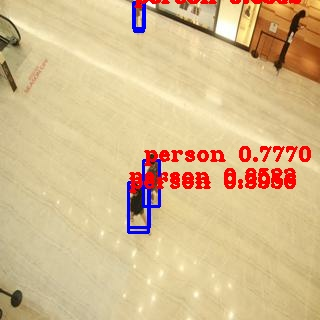

I0908 05:00:59.494737 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 1
I0908 05:01:04.362726 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6590642929077148


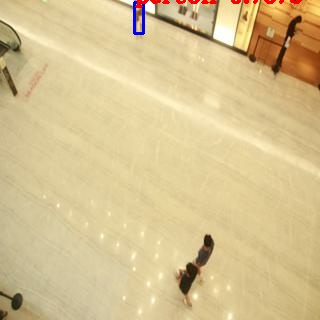

I0908 05:01:04.371785 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 2
I0908 05:01:09.197955 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6786437034606934


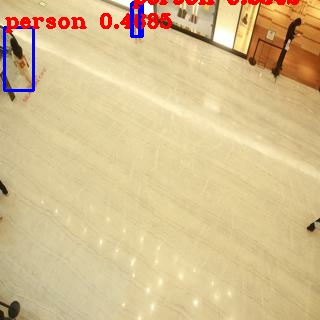

I0908 05:01:09.211768 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 3
I0908 05:01:13.913894 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6778740882873535


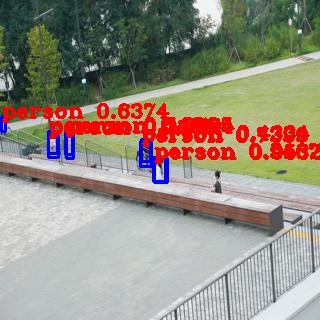

I0908 05:01:13.931244 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 4
I0908 05:01:18.985356 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.7009501457214355


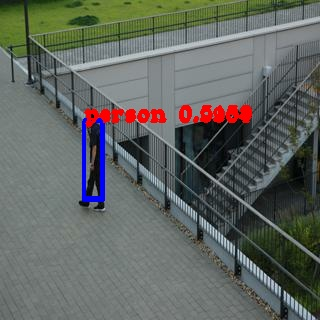

I0908 05:01:19.000671 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 5
I0908 05:01:23.798839 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6809906959533691


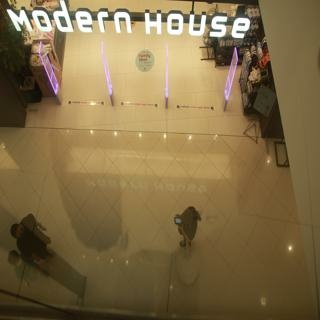

I0908 05:01:23.809663 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 6
I0908 05:01:28.780526 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6501188278198242


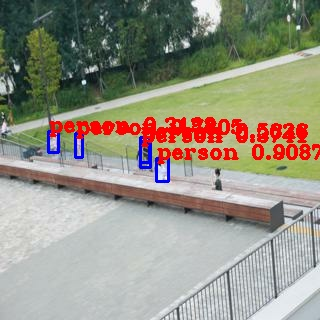

I0908 05:01:28.800089 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 7
I0908 05:01:33.441347 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6690614223480225


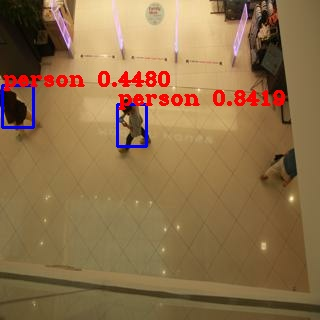

I0908 05:01:33.454640 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 8
I0908 05:01:38.368439 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.666661262512207


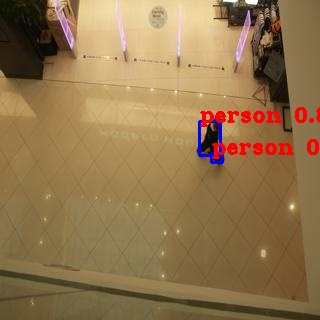

I0908 05:01:38.380494 140080898660224 <ipython-input-13-c0da83b634b6>:14] # 9
I0908 05:01:43.270507 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6659321784973145


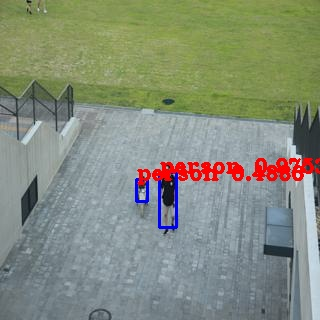

In [13]:
import glob

FLAGS.classes = '/content/drive/MyDrive/UAV/Model/data/uav.names'
FLAGS.weights = '/content/drive/MyDrive/UAV/Model/yolov3.tf'
#FLAGS.num_classes = 1
FLAGS.size = 320

hyperparameter(0.3,0.3)
imagePath='/content/drive/MyDrive/UAV/Model/dataset/resize_img/'
imgList = glob.glob(imagePath + '/*')
images = [file for file in imgList if file.endswith(".jpg") or file.endswith(".JPG")]

for i in range(10):
  logging.info('# {}'.format(i))
  FLAGS.image=images[i]
  load()


### Hyperparameters test

I0908 05:01:49.136545 140080898660224 <ipython-input-14-e3b1beda6449>:4] # iou threshold: 0.7, score threshold: 0.5
I0908 05:01:53.333361 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6839287281036377


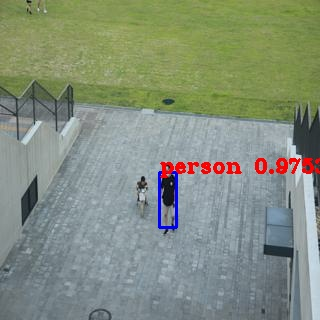

I0908 05:01:53.344179 140080898660224 <ipython-input-14-e3b1beda6449>:4] # iou threshold: 0.8, score threshold: 0.5
I0908 05:01:57.862163 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6687347888946533


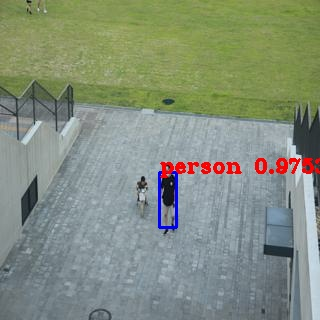

I0908 05:01:57.873631 140080898660224 <ipython-input-14-e3b1beda6449>:4] # iou threshold: 0.9, score threshold: 0.6
I0908 05:02:02.123202 140080898660224 <ipython-input-12-dd2e9ed20619>:48] time: 0.6806545257568359


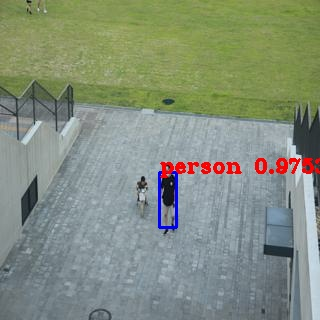

In [14]:
tests=[[0.7,0.5],[0.8,0.5],[0.9,0.6]]
for i in range(len(tests)):
  hyperparameter(tests[i][0],tests[i][1])
  logging.info('# iou threshold: {}, score threshold: {}'.format(tests[i][0], tests[i][1]))
  load()
